In [149]:
#Instalación de Librerias
import pandas as pd
import numpy as np
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# -----------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

# Fase 1. Exploración y Limpieza

## 1.1 Exploración inicial

In [150]:
#Lectura de los ficheros
flight=pd.read_csv('Customer Flight Activity.csv')
loyalty=pd.read_csv('Customer Loyalty History.csv')

### 1.1.1 Exploracion de datos columnas e información general

#### A) Fichero Flight

In [151]:
# Mostrar las primeras y las últimas  filas de cada archivo
## Fichero flight
flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [152]:
flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [153]:
# Estudio de la estructura del fichero
flight.shape
print(f"En el DataFrame tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")

En el DataFrame tenemos un total de 405624 filas y 10 columnas.


In [154]:
# Obtener información general de cada DataFrame
flight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


#### B) Fichero Loyalty

In [155]:
## Fichero Loyalty
loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [156]:
loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [157]:
loyalty.shape

print(f"En el DataFrame tenemos un total de {loyalty.shape[0]} filas y {loyalty.shape[1]} columnas.")

En el DataFrame tenemos un total de 16737 filas y 16 columnas.


In [158]:
# Obtener información general de cada DataFrame
loyalty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

### 1.1.2 Analisis de Duplicados 

#### A) Fichero Flight

In [159]:
# Identificar filas duplicadas en flight
duplicates_flight = flight[flight.duplicated()]

# Contar el número de filas duplicadas
num_duplicates_flight = len(duplicates_flight)

print(f"Número total de filas duplicadas en flight: {num_duplicates_flight}")

Número total de filas duplicadas en flight: 1864


In [160]:
# Mostrar las filas duplicadas
print("\nFilas duplicadas en flight:")

duplicates_flight



Filas duplicadas en flight:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [161]:
# Identificar  todas las filas  duplicadas en flight ya que con el código anterior no puedo identifcar el patron
duplicates_flight = flight[flight.duplicated(keep=False)] # Al añadir keep=False vemos que todas las instancias de duplicados se muestre

In [162]:
# Mostrar toda la información de los registros duplicados usando iloc
print("Registros completamente duplicados en flight:")
# Hemos usado un iloc para flitrar todos los duplicados de flight donde  donde iloc[:, :]muestra la informacion de todas las columnas y filas
print(duplicates_flight.iloc[:, :])  

Registros completamente duplicados en flight:
        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
41              101902  2017      1               0                        0   
42              101902  2017      1               0                        0   
226             112142  2017      1               0                        0   
227             112142  2017      1               0                        0   
477             126100  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405111          971370  2018     12               0                        0   
405409          988392  2018     12               0                        0   
405410          988392  2018     12               0                        0   
405436          989528  2018     12               0                        0   
405437          989528  2018     12               0                       

Como podemos observar los valores duplicados se encuentran el la columna "Loyalty Number" que repite la misma información en las filas que tienen el mismo "Loyalty Number"

In [163]:
# Tratamiento de los valores duplicados
# Al ver que los duplicados son el loyalty number que repite la misma información en varias filas hemos decidido proceder a su eliminacion.
#Vamos a usar drop para eliminar los duplicados y aplicamos inplace=True para que los cambios se mantengan en el df original 

In [164]:
# Eliminar duplicados en flight y modificar el dataframe original
flight.drop_duplicates(inplace=True)

# Resetear el índice del dataframe después de eliminar duplicados
flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


In [165]:
# Contar el número de registros duplicados basados en todas las columnas
num_registros_duplicados = flight.duplicated().sum()

# Mostrar el número de registros duplicados
print(f"Número de registros duplicados en flight: {num_registros_duplicados}")

Número de registros duplicados en flight: 0


In [166]:
print(f"En el DataFrame final tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")

En el DataFrame final tenemos un total de 403760 filas y 10 columnas.


#### B) Fichero Loyalty 

In [167]:
# Identificar filas duplicadas en loyalty
duplicates_loyalty = loyalty[loyalty.duplicated()]

# Contar el número de filas duplicadas
num_duplicates_loyalty = len(duplicates_loyalty)

print(f"Número total de filas duplicadas en loyalty: {num_duplicates_loyalty}")

Número total de filas duplicadas en loyalty: 0


### 1.1.3 Analisis de los valores nulos iniciales

#### A) Flight 

In [168]:
# Valores nulos en flight
print("Porcentaje de valores nulos en flight:")
print((flight.isnull().sum() / len(flight)) * 100)

Porcentaje de valores nulos en flight:
Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


#### B) Loyalty

In [169]:
# Valores nulos en loyalty
print("Valores nulos en loyalty:")
print((loyalty.isnull().sum() / len(loyalty)) * 100)

Valores nulos en loyalty:
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


- El tratamiento de los valores nulos, se va a hacer una vez meregado las tablas. 

- La limpieza de los valores nulos antes de la unión de las tablas puede afectar a la integridad del datos y reducir la cantidad de los datos disponibles (ya que podemos estar haciendo una imputacion inadecuada de los datos), por lo que entendemos que es mejor unir primero y luego limpiar ya que se pueden presevar muchos más datos.

###  1.1.4 Análisis Exploratorio incial individual

#### A) Flight 

In [170]:
# Usamos describe para generar estadisticas descriptivas de las columnas nùmericas del dataframe

flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


**Year y Month**</p>

- **mean o media**: El año promedio de las reservas de vuelos es 2017,5.
- **std o desviación media**: Es igual  0.5 para el la columna año  lo que puede indicar que la mayoría de las reservas se concentran en 2017 y 2018. 
- **min**: El valor mínimo de 2017 para el año indica que todos los registros están limitados a este año y al siguiente.
- **Analisis de los Cuartiles**: Estos percentiles para el mes (Month) muestran cómo se distribuyen los meses a lo largo del año. Por ejemplo, el 25% de las reservas ocurren en o antes de abril (mes 4), la mediana está en julio (mes 7), y el 75% de las reservas están en octubre (mes 10), lo que puede indicar una estacionalidad en la reserva de largo del año
- **max**: El valor máximo de 2018 para el año indica que no hay registros más allá de este año.

**Flights Booked, Flights with Companions, Total Flights** </p>
En en el caso de las variables relacionadas con los vuelos, el resumen de los estadisticos es el siguiente:

- **mean o media**: Las medias de 4.13 para Flights Booked, 1.04 para Flights with Companions, y 5.17 para Total Flights. </p>
- **std**: Las desviaciones estándar de 5.23 para Flights Booked, 2.08 para Flights with Companions, y 6.53 para Total Flights muestran la dispersión de los datos alrededor de la media. </p>
- **min**: Los valores mínimos de 0 indican que hay registros donde no se reservaron vuelos o no hubo vuelos con otras compañias. </p>
- **max**: Los valores máximos de 21 para Flights Booked, 11 para Flights with Companions, y 32 para Total Flights indican los máximos observados en estas variables.


**Distance** </p>

- **mean o media**:La media de 1.214,46 indica la distancia promedio de los vuelos reservados en el conjunto de datos.
- **std**: La desviación estándar de 1,434.10 muestra la variabilidad de las distancias de vuelo e indica que las distancias de los vuelos tiendan a estar más dispersas alrededor de lamedia.
- **min**: El valor mínimo de 0 indica que hay registros sin distancia de vuelo.
-**Analisis de los Cuartiles**:25%, 50%, 75%: Estos percentiles muestran cómo se distribuyen las distancias de vuelo en el conjunto de datos, donde el 25% de los vuelos tiene una distancia de 525, la mitad de los vuelos recorren una distancia  de 2342 y el 75% de los vuelos tienen una distancia igual o superior a 6293

**Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed** </p>

- **mean o media**: Las medias de 124,26 para Points Accumulated, 30,84 para Points Redeemed, y 2,50 para Dollar Cost Points Redeemed 
- **std**: Las desviaciones estándar de 146,70 para Points Accumulated, significa que los puntos acumulados tienden a estar dispersos alrededor de la media de puntos, la desviación de  Points Redeemed es 125,76 e indica que los valores de los puntos canjeados varían bastante de un caso a otro Finalmente para Dollar Cost Points Redeeme la desviación es 10,17 y por lo tanto estos valores estan mas cerca de la media, tienen menos variabilidad.
- **min**Los valores mínimos de 0 indican que hay registros sin puntos acumulados, puntos canjeados, o costos en dólares de puntos canjeados.
- **max**: Los valores máximos de 676,5 para Points Accumulated, 876.0 para Points Redeemed, y 71.0 para Dollar Cost Points Redeemed 

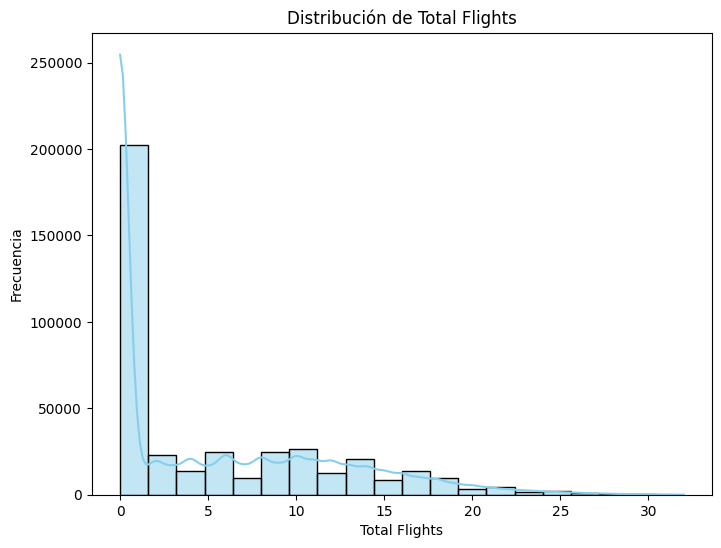

In [173]:
#Histograma de 'Total Flights
plt.figure(figsize=(8, 6))
sns.histplot(flight['Total Flights'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Total Flights')
plt.xlabel('Total Flights')
plt.ylabel('Frecuencia')
plt.show()


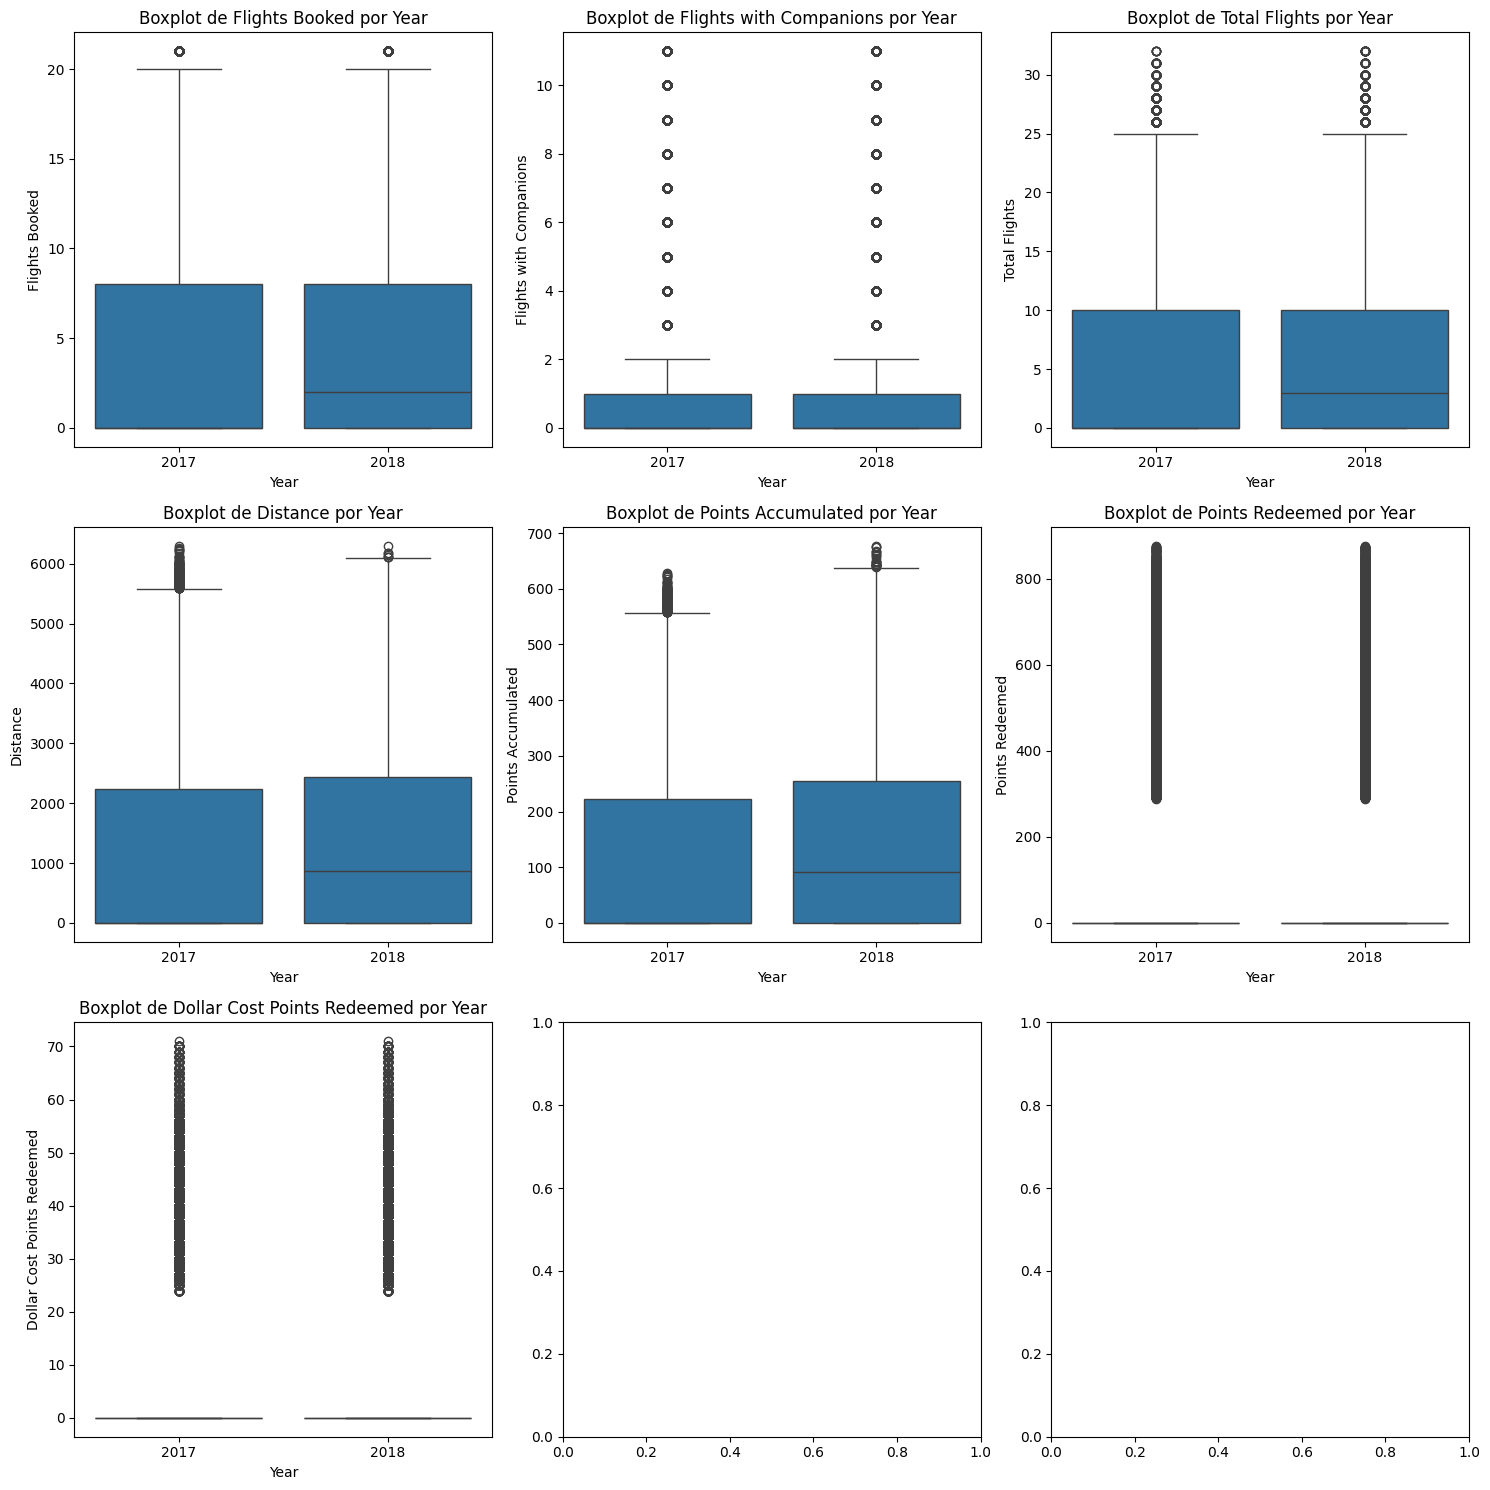

In [176]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Variables numéricas a incluir en el boxplot
numeric_variables = ['Flights Booked', 'Flights with Companions', 'Total Flights', 
                     'Distance', 'Points Accumulated', 'Points Redeemed', 
                     'Dollar Cost Points Redeemed']

# Iterar sobre cada variable y dibujar el boxplot por año  
for i, var in enumerate(numeric_variables): #Iteramos sobre cada variable numérica (var) agrupado por year
    row = i // 3
    col = i % 3
    sns.boxplot(x='Year', y=var, data=flight, ax=axes[row, col]) #Utilizamos sns.boxplot() para dibujar cada boxplot en el subplot correspondiente (axes[row, col])
    axes[row, col].set_title(f'Boxplot de {var} por Year')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(var)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### B) Loyalty

In [172]:
loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


**Salary**</p>

- **count**: Hay 12499 registros en esta variable
- **mean o media**: El año promedio del salario es 79.245,61
- **std o desviación media**: Es igual  35.008,30 es grande en comparación con la media, lo que sugiere que los salarios varían significativamente alrededor de este valor promedio.
- **min**: El valor mínimo de -58.486  
- **Analisis de los Cuartiles**: el 25% de los salarios del conjunto esta en 59.246,50. El 50% de los salarios están por debajo de 73.455 y el 75% de los salarios esta por debajo de 88517,50
- **max**: El valor máximo es 407228, es decir alguno de los pasajeros tienen unos ingresos de esa cantidad

**CLTV**</p>

- **count**: Hay 16.737 registros en esta variable
- **mean o media**: El valor economico que se dejan los clientes  7.988,90
- **std o desviación media**: Es igual 6.860.98 indica que los valores estan bastante dispersos alredredor de la media.
- **min**: El valor mínimo de 1.898,01  
- **Analisis de los Cuartiles**: el 25% de los clientes tiene un CLV  CLV tienen un valor igual o inferior a 3.980,84, El 50% de los registros de CLV tienen un valor igual o inferior a 5.780,18 el otro 50% tienen un valor igual o superior a este número. Por último  75% de los registros de CLV tienen un valor igual o inferior a 8.940,58
- **max**: 83.325,38

**Enrollment Month y Cancellation Month**</p>

Ambas variables siguen un patrón similar en sus estadísticas descriptivas

**Cancellation Year**</p>

- **count**: Hay 2.067registros en esta variable
- **mean o media**: El promedio de las cancelaciones es para el año 2016
- **std o desviación media**: Es igual 1.38 indica que los valores estan bastante dispersos alredredor de la media.
- **min**: El valor mínimo de 2013
- **Analisis de los Cuartiles**: el 25% de las cancelaciones tiene estan  en 2016. El 50% de los registros tienen un valor igual o inferior tienen un valor de a 2017 y el 75% de los  registros tienen un valor igual o inferior al año 2018.
- **max**: 2018

**Cancellation Month**</p>

- **count**: Hay 2.067registros en esta variable
- **mean o media**: El promedio de las cancelaciones es para el año 6.96
- **std o desviación media**: Es igual 3.46 indica que los valores estan bastante dispersos alredredor de la media,es decir significa que los meses en que ocurren las cancelaciones tienden a estar dispersos alrededor de la media de 6.96. 

- **Analisis de los Cuartiles**: el 25% de los meses cancelados tiene estan  es  4. El 50% de los registros tienen un valor igual o inferior tienen un valor de a 7 y el 75% de los  registros tienen un valor igual o inferior 10 octubre.


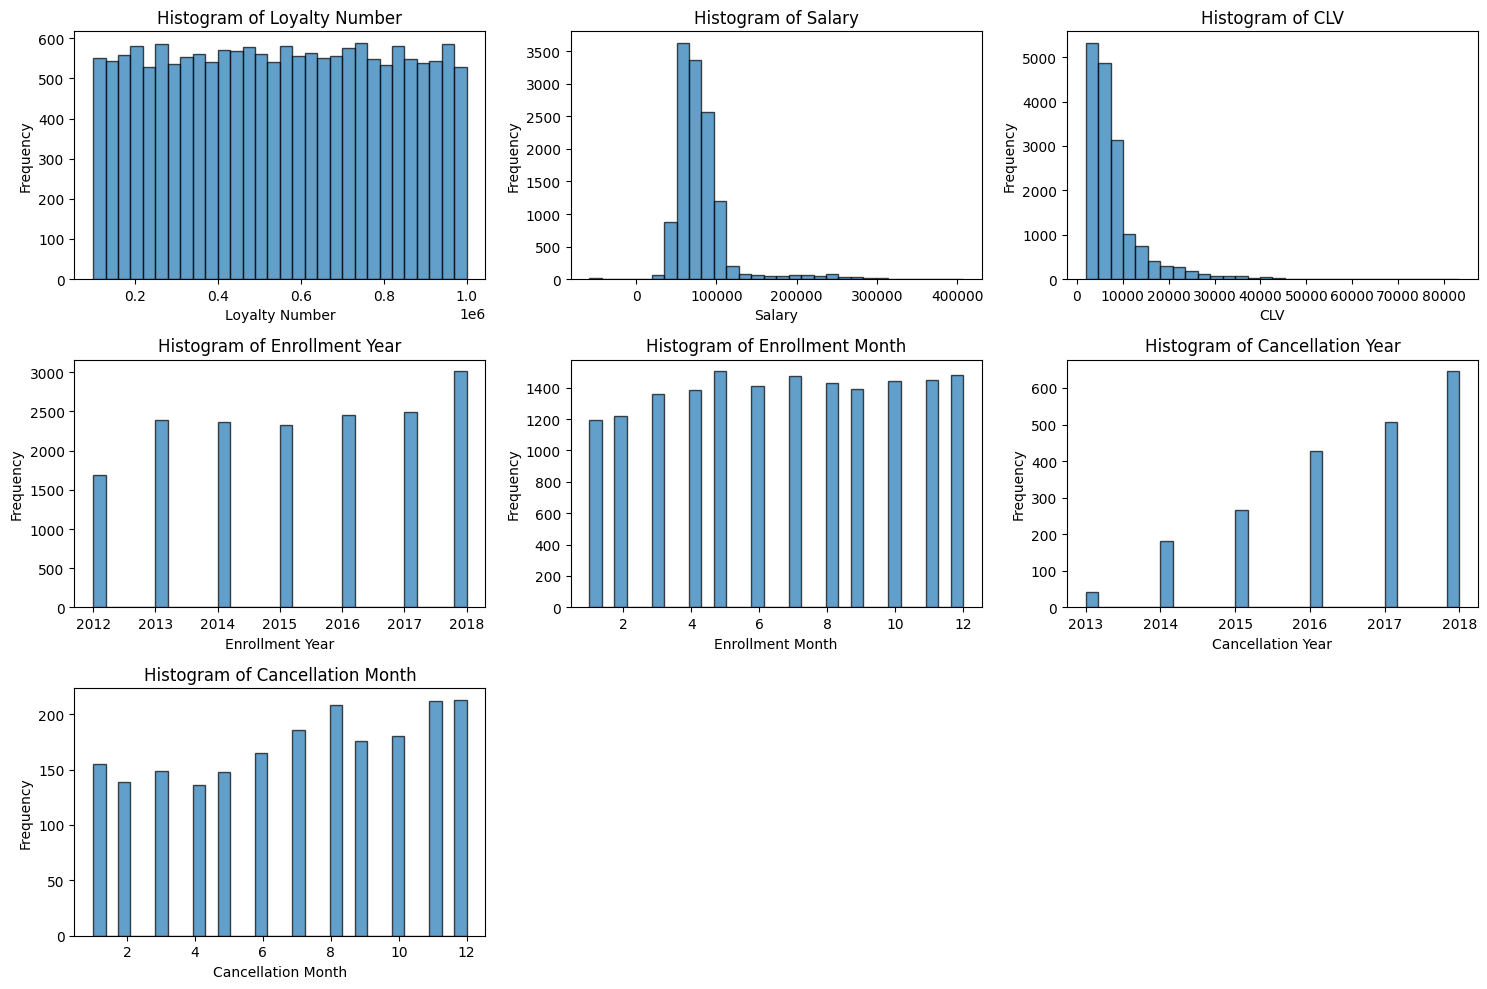

In [179]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'loyalty' es tu dataframe con los datos

# Obtener solo las columnas numéricas para el histograma
numeric_columns = loyalty.select_dtypes(include='number').columns

# Configurar la disposición de los subplots
num_plots = len(numeric_columns)
num_cols = 3  # Número de columnas en la disposición de subplots
num_rows = (num_plots // num_cols) + (num_plots % num_cols)  # Calcular el número de filas que hay que tener en los graficos en funcion del numero de columnas

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna numérica y crear un histograma
#Usamos un for por cada una de las columnas numerica y vamos iterando para que se vaya creando un histograma
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(loyalty[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los histogramas
plt.show()


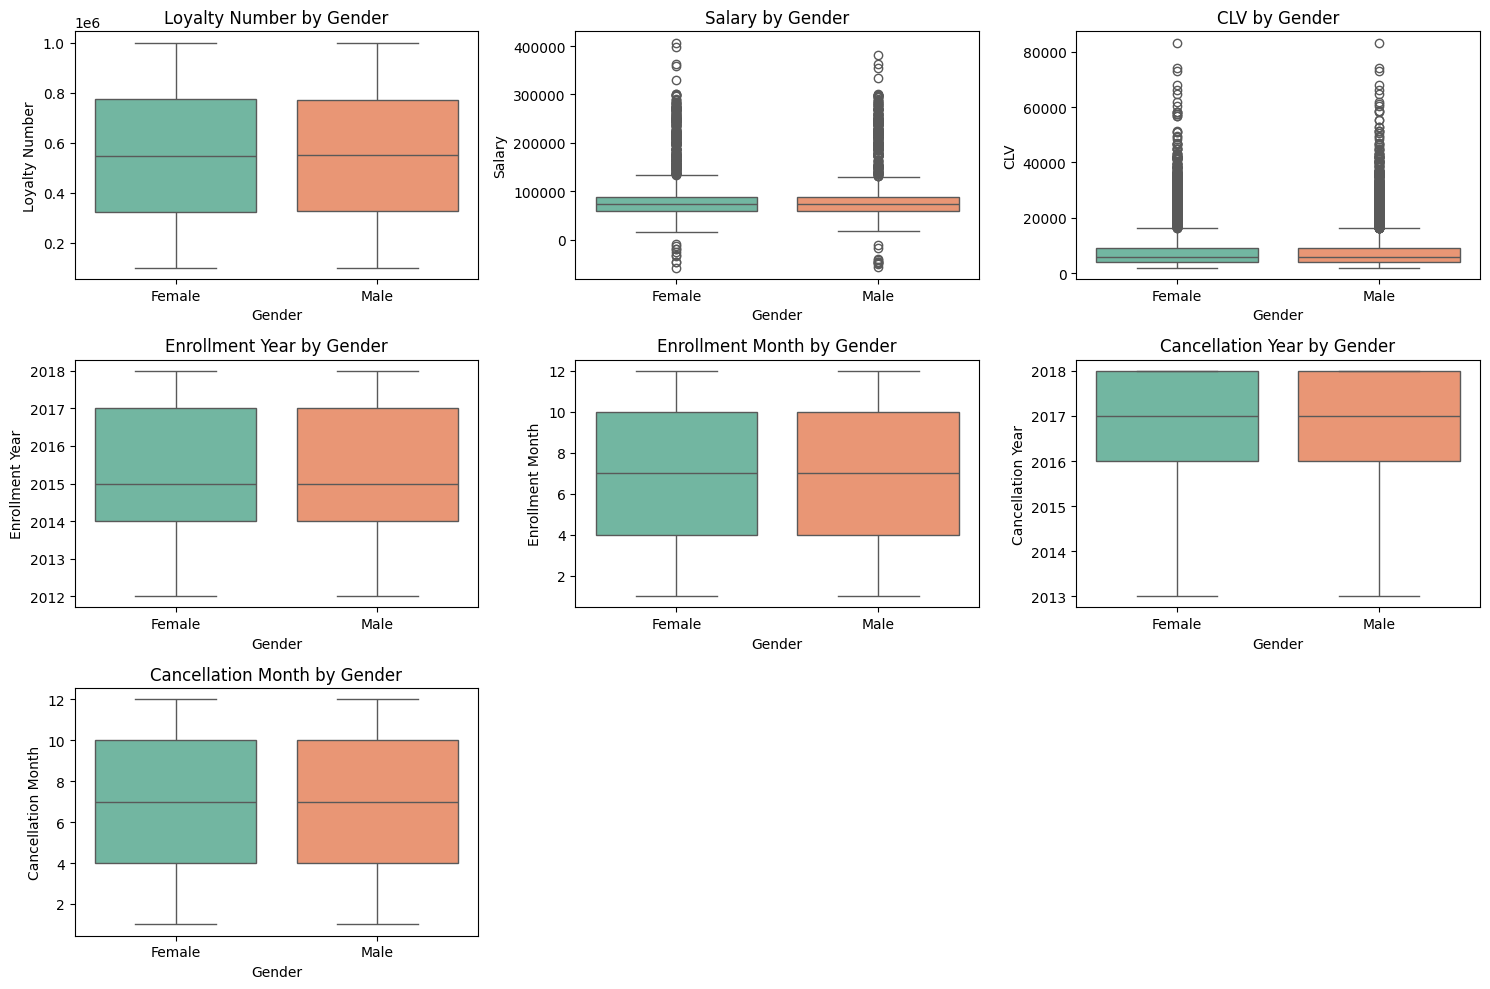

In [181]:

numeric_columns = loyalty.select_dtypes(include='number').columns
categorical_column = 'Gender'

# Configurar el tamaño de la figura según el número de columnas numéricas
num_plots = len(numeric_columns)
num_cols = 3  # Número de columnas en la disposición de subplots
num_rows = (num_plots // num_cols) + (num_plots % num_cols)  # Calcular el número de filas

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada variable numérica y crear un boxplot por género
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=categorical_column, y=col, data=loyalty, palette='Set2')
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.title(f'{col} by {categorical_column}')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los boxplots
plt.show()


###  1.1.5 Unión de Ficheros